In [1]:
# %%
from keras.datasets import mnist

# %%
import numpy as np
import matplotlib.pyplot as plt

2023-10-05 17:36:46.439991: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-05 17:36:46.443837: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 17:36:46.512798: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 17:36:46.512859: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 17:36:46.512896: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

Text(0.5, 1.0, '6')

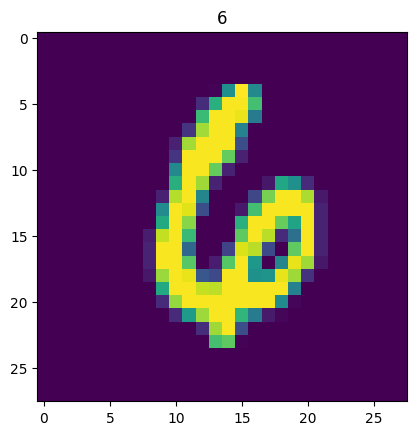

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

# %%
plt.imshow(X_train[39])
plt.title(y_train[39])

In [3]:
X_train[0].shape

(28, 28)

In [4]:
y_train[0].shape

()

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten
from keras.models import Sequential

from keras.src.layers import GlobalAveragePooling2D


In [8]:
model = Sequential()

model.add(Conv2D(4, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(2,2))

model.add(Conv2D(4, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(2,2))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3,batch_size=1)

Epoch 1/3
60000/60000 [==============================] - 512s 9ms/step - loss: 0.2794 - accuracy: 0.9272 - val_loss: 0.1158 - val_accuracy: 0.9640
Epoch 2/3
60000/60000 [==============================] - 511s 9ms/step - loss: 0.1246 - accuracy: 0.9630 - val_loss: 0.1117 - val_accuracy: 0.9643
Epoch 3/3
60000/60000 [==============================] - 535s 9ms/step - loss: 0.1196 - accuracy: 0.9646 - val_loss: 0.1303 - val_accuracy: 0.9626


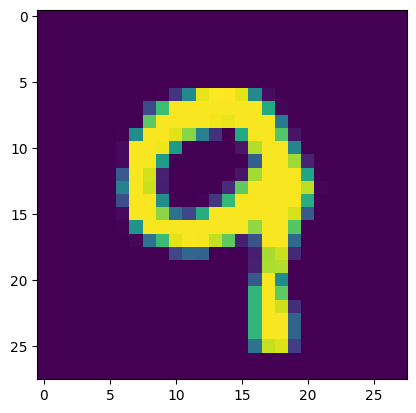

In [11]:
plt.imshow(X_test[99])

In [12]:
test=X_test[99].reshape(-1,28,28,1)


predictions = np.argmax(model.predict(test), axis=-1)

1/1 [==============================] - 0s 117ms/step


In [13]:
predictions

array([9])

In [14]:
model.save("./model.h5")

/home/brian/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
import numpy as np
import cv2 as cv
import pygame.font
import pygame.freetype
import pygame,sys
from pygame.locals import *
from tensorflow.keras.models import load_model

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [30]:
pygame.freetype.init()
font = pygame.freetype.SysFont('Times New Roman', 30)


WHITE=(255,255,255)
BLACK=(0,0,0)
pygame.init()

DISPLAYSURFACE=pygame.display.set_mode((300,300))
BOUNDARYINC=5
WINDOWSIZEX=640
WINDOWSIZEY=480
IMAGESAVE=False
PREDICT=True
WHITE_INT=DISPLAYSURFACE.map_rgb(WHITE)
pygame.display.set_caption("Test")

iswriting=False

number_xcord=[]
number_ycord=[]
inmg_cnt=1

while True:
  for event in pygame.event.get():
    if event.type==pygame.QUIT:
      pygame.quit()
      sys.exit()

    if event.type==pygame.MOUSEMOTION and iswriting:
      xcord,ycord=event.pos
      pygame.draw.circle(DISPLAYSURFACE,WHITE,(xcord,ycord),5,5)
      number_xcord.append(xcord)
      number_ycord.append(ycord)

    if event.type==pygame.MOUSEBUTTONDOWN:
      iswriting=True
      DISPLAYSURFACE.fill(BLACK)

    if event.type==pygame.MOUSEBUTTONUP:
      iswriting=False
      number_xcord=sorted(number_xcord)
      number_ycord=sorted(number_ycord)

      rect_min_x=max(number_xcord[0]-BOUNDARYINC,0)
      rect_max_x= min(WINDOWSIZEX,number_xcord[-1]+BOUNDARYINC)
      rect_min_y=max(number_ycord[0]-BOUNDARYINC,0)
      rect_max_y=min(WINDOWSIZEY,number_ycord[-1]+BOUNDARYINC)

      number_xcord = []
      number_ycord = []

      pygame.image.save(DISPLAYSURFACE, "img.png")
      img_arr=cv.imread("img.png",cv.IMREAD_GRAYSCALE)
      img_arr=cv.GaussianBlur(img_arr,(5,5),0)  
      img_arr = img_arr.astype(np.uint8)
      if IMAGESAVE:
        cv.imwrite("image.png") 
        inmg_cnt += 1
      if PREDICT:
        image=cv.resize(img_arr, (28,28))
        
        
        predictions = np.argmax(model.predict(image.reshape(-1,28,28,1)), axis=-1)
        label = str( predictions[0])
        pygame.draw.rect (DISPLAYSURFACE, (255,0,0), (rect_min_x, rect_min_y, rect_max_x-rect_min_y, rect_max_y-rect_min_y), 3) 
        font.render_to(DISPLAYSURFACE, (rect_min_x, rect_min_y), label, (255,0,0),30)

      if event.type==pygame.KEYDOWN:
        if event.unicode=='N':
          DISPLAYSURFACE.fill(BLACK)
    pygame.display.update()    


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


1/1 [==============================] - 0s 26ms/step


SystemExit: 

In [27]:
cv.imshow("omg",image)
cv.waitKey(1000)
cv.destroyAllWindows()